In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from pandas.plotting._misc import scatter_matrix

In [57]:
import statsmodels.api as sm
import numpy as np

In [30]:
df= pd.read_csv("cartoon.csv")
df.head()

,character,height,weight
0,Super Mario,12.5,211.5
1,Hello Kitty,6.7,2.7
2,BB8,3.2,58.7
3,Super Mario,12.3,186.4
4,Hello Kitty,3.5,2.1


height       AxesSubplot(0.125,0.536818;0.352273x0.343182)
weight    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

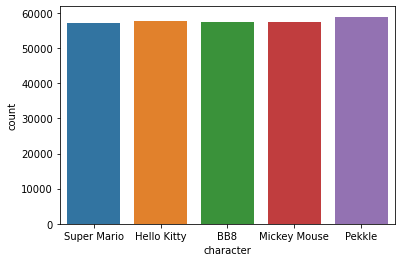

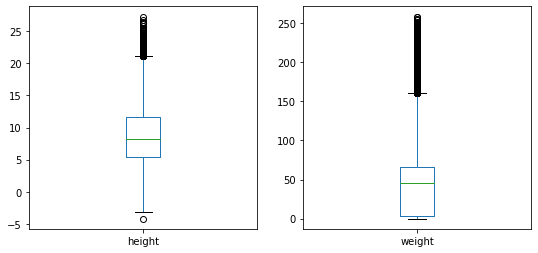

In [3]:
#CHARACTER BOXPLOT
sns.countplot(df['character'],label="Count")
df.plot(kind='box', subplots=True, layout=(2,2),
sharex=False, sharey=False, figsize=(9,9))

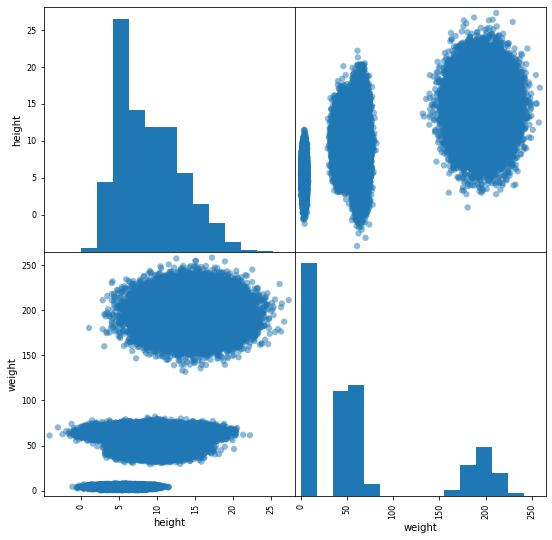

In [37]:
#SCATTER MATRIX
feature_names =  ['height', 'weight']
X = df[feature_names]
y = df['character']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X,marker = 'o', s=40, hist_kwds={'bins':15},
figsize=(9,9), cmap = cmap)

In [39]:
#TRANSFORMING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print(logreg.score(X_train, y_train))

0.8462416262416262


Our logreg score is measuring the accuracy of the model against the training data. Since it's close to one, looks like our model is relatively accurate in predicting the character

In [75]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_fit=knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(knn.score(X_train, y_train))

0.9034372834372835


Our knn score is evaluating the accuracy of the KNN classifier-- our score is close to 1, so this model looks pretty accurate in predicting character

The KNN method is more accurate than the regression method.